# Write a Python Program for Contrast Stretching with a histogram comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
!wget -q -O lena_colored.png "https://drive.google.com/uc?export=download&id=1SQXXo6c1DSpWi-Gy95QNiNAx4E-bvJnf"

In [2]:
# Read the image
image_path = "lena_colored.png"  # Replace with image name
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [3]:
def contrast_stretching(image):
    # Get the minimum and maximum pixel values in the image
    min_val = np.min(image)
    max_val = np.max(image)

    # Perform contrast stretching
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)

    return stretched_image

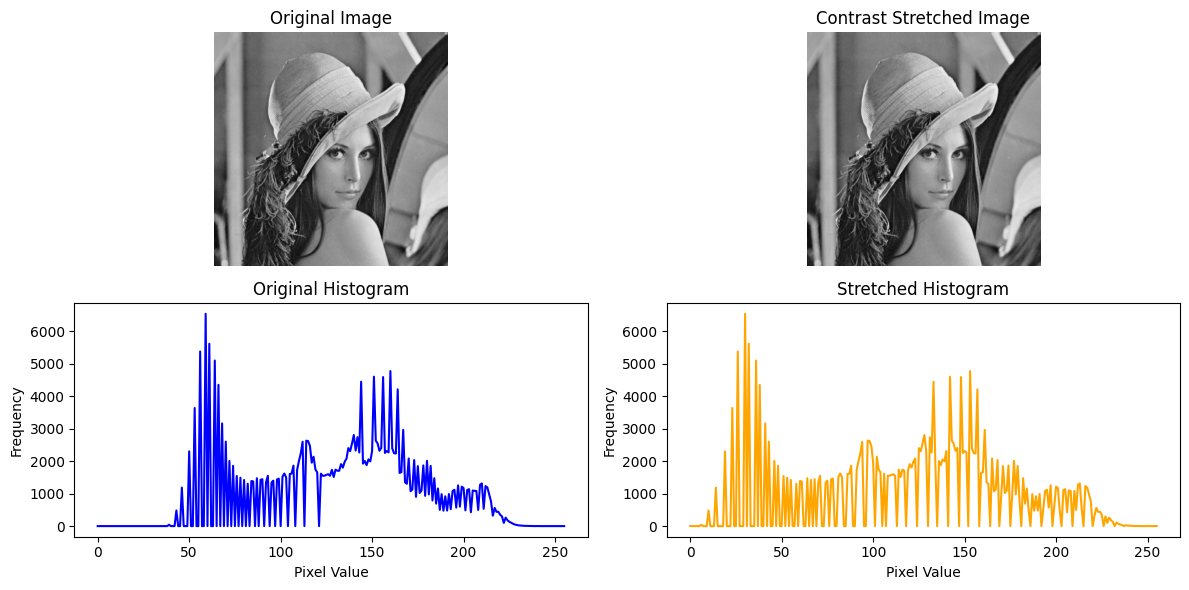

In [4]:
# Check if the image has been successfully loaded
if image is None:
    print("Error: Could not read the image.")
else:
    # Perform contrast stretching
    stretched_image = contrast_stretching(image)

    # Calculate histograms
    original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    stretched_hist = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])

    # Display the original and stretched images
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title('Contrast Stretched Image')
    plt.axis('off')

    # Display the original and stretched histograms
    plt.subplot(2, 2, 3)
    plt.plot(original_hist, color='blue')
    plt.title('Original Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    plt.plot(stretched_hist, color='orange')
    plt.title('Stretched Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()